#### PROBLEM STATEMENT



- This dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Our aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- Markdowns are crucial to promote sales especially before key events such as Super Bowl, Christmas and Thanksgiving. 
- Developing accurate model will enable make informed decisions and make recommendations to improve business processes in the future. 
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

In [1]:
# !pip install scikit-learn==1.5.1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [3]:
# import the csv files using pandas 
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [4]:
# Let's explore the 3 dataframes
# "stores" dataframe contains information related to the 45 stores such as type and size of store.

stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
stores.groupby('Type')['Store'].count()

Type
A    22
B    17
C     6
Name: Store, dtype: int64

In [6]:
stores.groupby('Type')['Size'].mean(), stores['Size'].mean()

(Type
 A    177247.727273
 B    101190.705882
 C     40541.666667
 Name: Size, dtype: float64,
 130287.6)

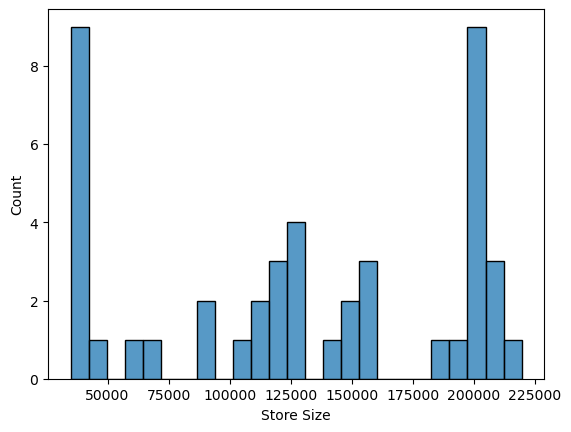

In [7]:
sns.histplot(x='Size',data=stores,bins=25)
plt.xlabel('Store Size')
plt.show()

In [8]:
# Let's explore the "feature" dataframe
# Features dataframe contains additional data related to the store, department, and regional activity for the given dates.
# Store: store number
# Date: week
# Temperature: average temperature in the region
# Fuel_Price: cost of fuel in the region
# MarkDown1-5: anonymized data related to promotional markdowns. 
# CPI: consumer price index
# Unemployment: unemployment rate
# IsHoliday: whether the week is a special holiday week or not

feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
feature['MarkDown1'].value_counts()

17.01      2
460.73     2
2920.43    2
6510.79    2
4855.31    2
          ..
3679.59    1
2569.12    1
312.11     1
5042.40    1
5391.36    1
Name: MarkDown1, Length: 4023, dtype: int64

In [10]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
feature['IsHoliday'] = feature['IsHoliday'].map({True:1,False:0})
feature['Date'] = pd.to_datetime(feature['Date'])
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


In [12]:
# Let's explore the "sales" dataframe
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
# Store: store number
# Dept: department number
# Date: the week
# Weekly_Sales: sales for the given department in the given store
# IsHoliday: whether the week is a special holiday week

sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [13]:
sales['IsHoliday'] = sales['IsHoliday'].map({True:1,False:0})
sales['Date'] = pd.to_datetime(sales['Date'])
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,0
1,1,1,2010-12-02,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-05-03,21827.90,0


#### MERGE THE DATASETS INTO ONE DATAFRAME

In [14]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])

In [15]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [16]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [17]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')

In [18]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [19]:
x = '2010-05-02'
str(x).split('-')

['2010', '05', '02']

MINI CHALLENGE
- Define a function to extract the month information from the dataframe column "Date"
- Apply the function to the entire column "Date" in the merged dataframe "df" and write the output in a column entitled "month"


In [20]:
def extract_month(date):
    return int(str(date).split('-')[1])

In [21]:
df['Month'] = df['Date'].apply(extract_month)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-05-02,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5


In [22]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421569,45,98,2012-10-26,1076.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


#### EXPLORE MERGED DATASET

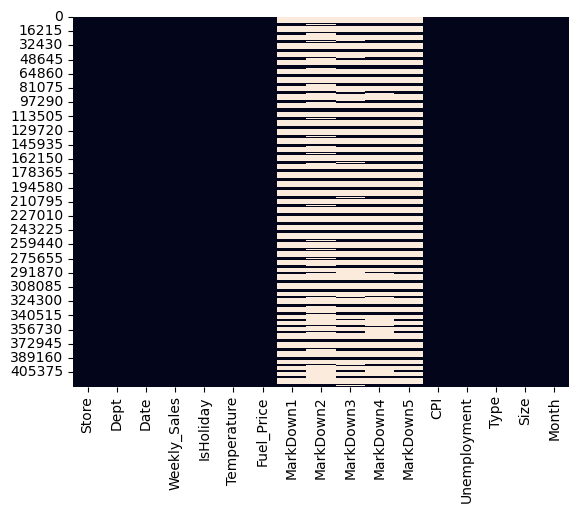

In [23]:
sns.heatmap(df.isnull(), cbar = False)  # shows we have a lot of nulls in MarkDown1-MarkDown5
plt.show()

In [24]:
# check the number of non-null values in the dataframe
df.isnull().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Month                0
dtype: int64

In [25]:
# Fill up NaN elements with zeros
df = df.fillna(0)

In [26]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5


In [27]:
# Statistical summary of the combined dataframe
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,6.478580
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,3.324757
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,4.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,6.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,9.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000


In [28]:
# check the number of duplicated entries in the dataframe
df.duplicated().sum()


0

In [29]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

#### EXPLORATORY DATA ANALYSIS

In [30]:
# Create pivot tables to understand the relationship in the data

result = pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date', 'Store', 'Dept'],
                    aggfunc= np.mean)

In [31]:
result

Type                          A         B   C
Date       Store Dept                        
2010-01-10 1     1     20094.19       NaN NaN
                 2     45829.02       NaN NaN
                 3      9775.17       NaN NaN
                 4     34912.45       NaN NaN
                 5     23381.38       NaN NaN
...                         ...       ...  ..
2012-12-10 45    93         NaN   2644.24 NaN
                 94         NaN   4041.28 NaN
                 95         NaN  49334.77 NaN
                 97         NaN   6463.32 NaN
                 98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [32]:
result.describe()
# It can be seen that Type A stores have much higher sales than Type B and Type C

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [33]:
result_md = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date', 'Store','Dept'],
                    aggfunc={'MarkDown1' : np.mean,'MarkDown2' : np.mean, 'MarkDown3' : np.mean, 'MarkDown4' : np.mean, 'MarkDown5' : np.mean})

In [34]:
result_md

MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2010-01-10 1     1         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 2         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 3         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 4         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 5         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-12-10 45    93     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 94     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 95     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 97     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 98     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   

                      MarkDown5      
IsHoliday                     0   1  
Date       Store Dept                
2010-01-10 1     1         0.00 NaN  
                 2         0.00 NaN  
                 3         0.00 NaN  
                 4         0.00 NaN  
                 5         0.00 NaN  
...                         ...  ..  
2012-12-10 45    93     3990.54 NaN  
                 94     3990.54 NaN  
                 95     3990.54 NaN  
                 97     3990.54 NaN  
                 98     3990.54 NaN  

[421570 rows x 10 columns]

In [35]:
result_md.sum()

           IsHoliday
MarkDown1  0            1.017371e+09
           1            7.452684e+07
MarkDown2  0            2.310619e+08
           1            1.399088e+08
MarkDown3  0            2.460332e+07
           1            1.727284e+08
MarkDown4  0            4.196331e+08
           1            3.698298e+07
MarkDown5  0            6.585670e+08
           1            4.240793e+07
dtype: float64

In [36]:
result_md.describe()
# we can conclude that MarkDown2 and MarkDown3 have higher volume on holidays compared to that of regular days 
# while other MarkDowns don't show significant changes relating to holiday.

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      391909.000000  29661.000000  391909.000000   29661.000000   
mean         2595.936803   2512.620778     589.580546    4716.929394   
std          6123.402037   5020.047408    2984.163111   15295.329993   
min             0.000000      0.000000    -265.760000      -9.980000   
25%             0.000000      0.000000       0.000000       0.000000   
50%             0.000000      0.000000       0.000000       0.000000   
75%          2826.570000   2463.160000       0.500000      65.000000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      391909.000000   29661.000000  391909.000000  29661.000000   
mean           62.778142    5823.417900    1070.741151   1246.855336   
std           630.704594   19959.302249    3921.553070   3513.998030   
min           -29.100000       0.000000       0.000000      0.000000   
25%             0.000000       0.000000       0.000000      0.000000   
50%             0.000000       0.000000       0.000000      0.000000   
75%             3.840000      66.080000     442.390000    319.190000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      391909.000000  29661.000000  
mean         1680.408001   1429.754053  
std          4312.031598   2427.638027  
min             0.000000      0.000000  
25%             0.000000      0.000000  
50%             0.000000      0.000000  
75%          2182.320000   2069.300000  
max        108519.280000  11100.550000

In [37]:
corr_matrix = df.drop(columns = ['Store']).corr()

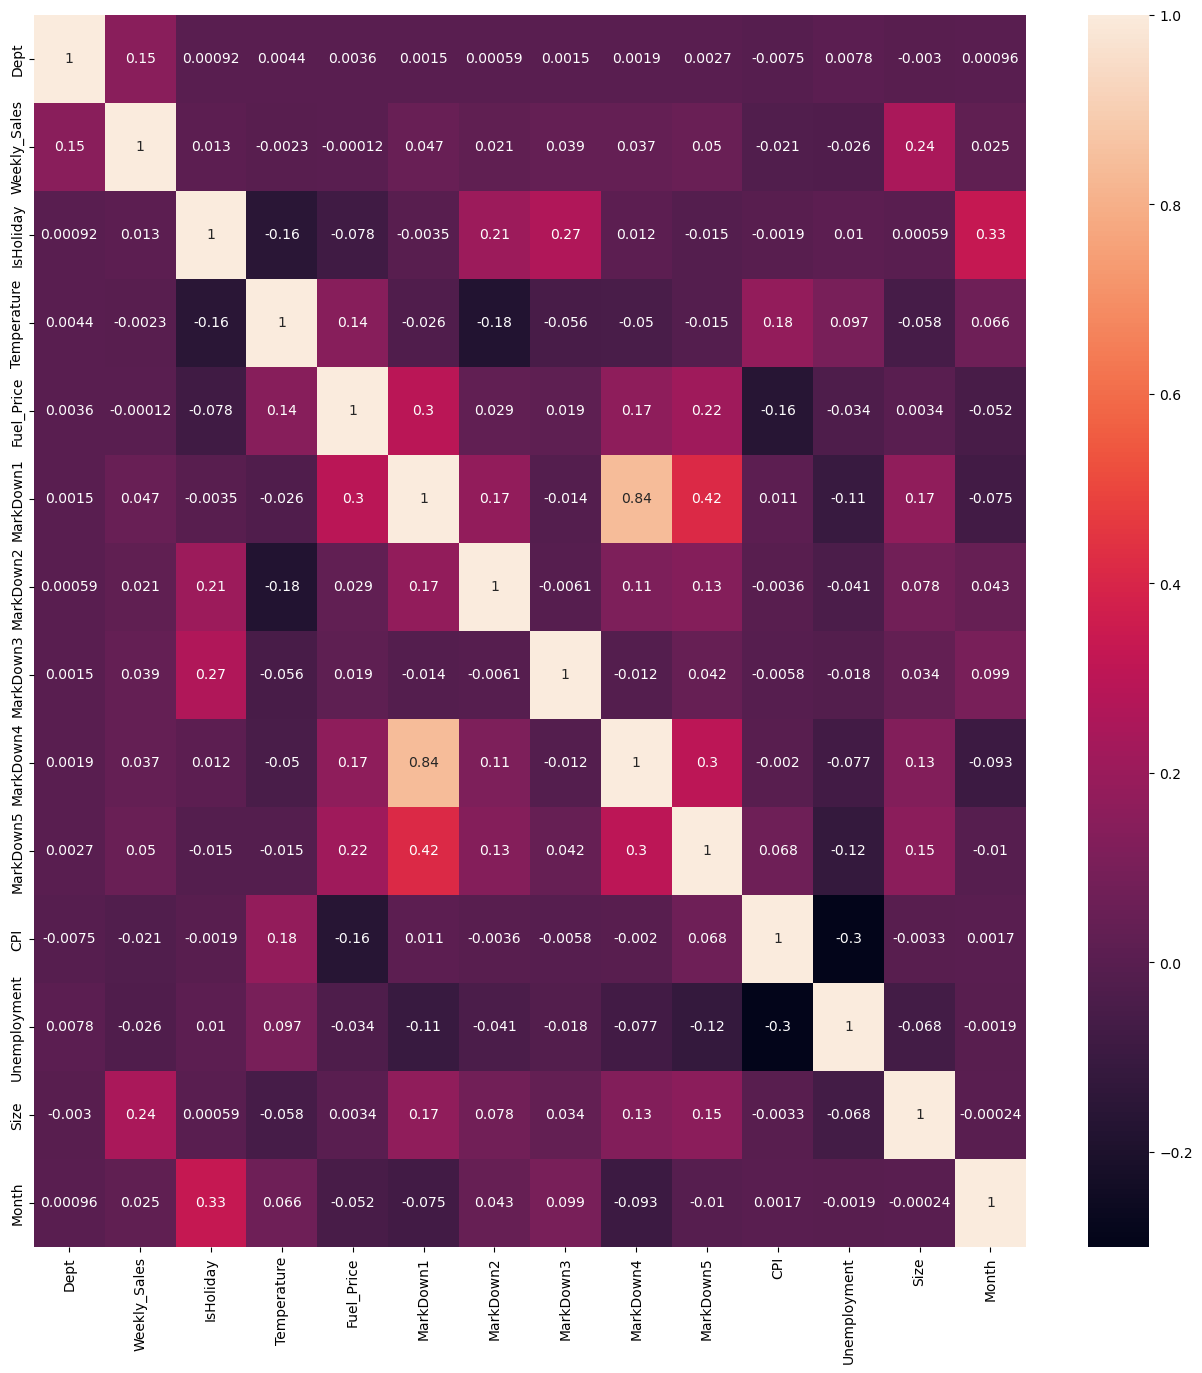

In [38]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

#### DATA VISUALIZATION

In [39]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5


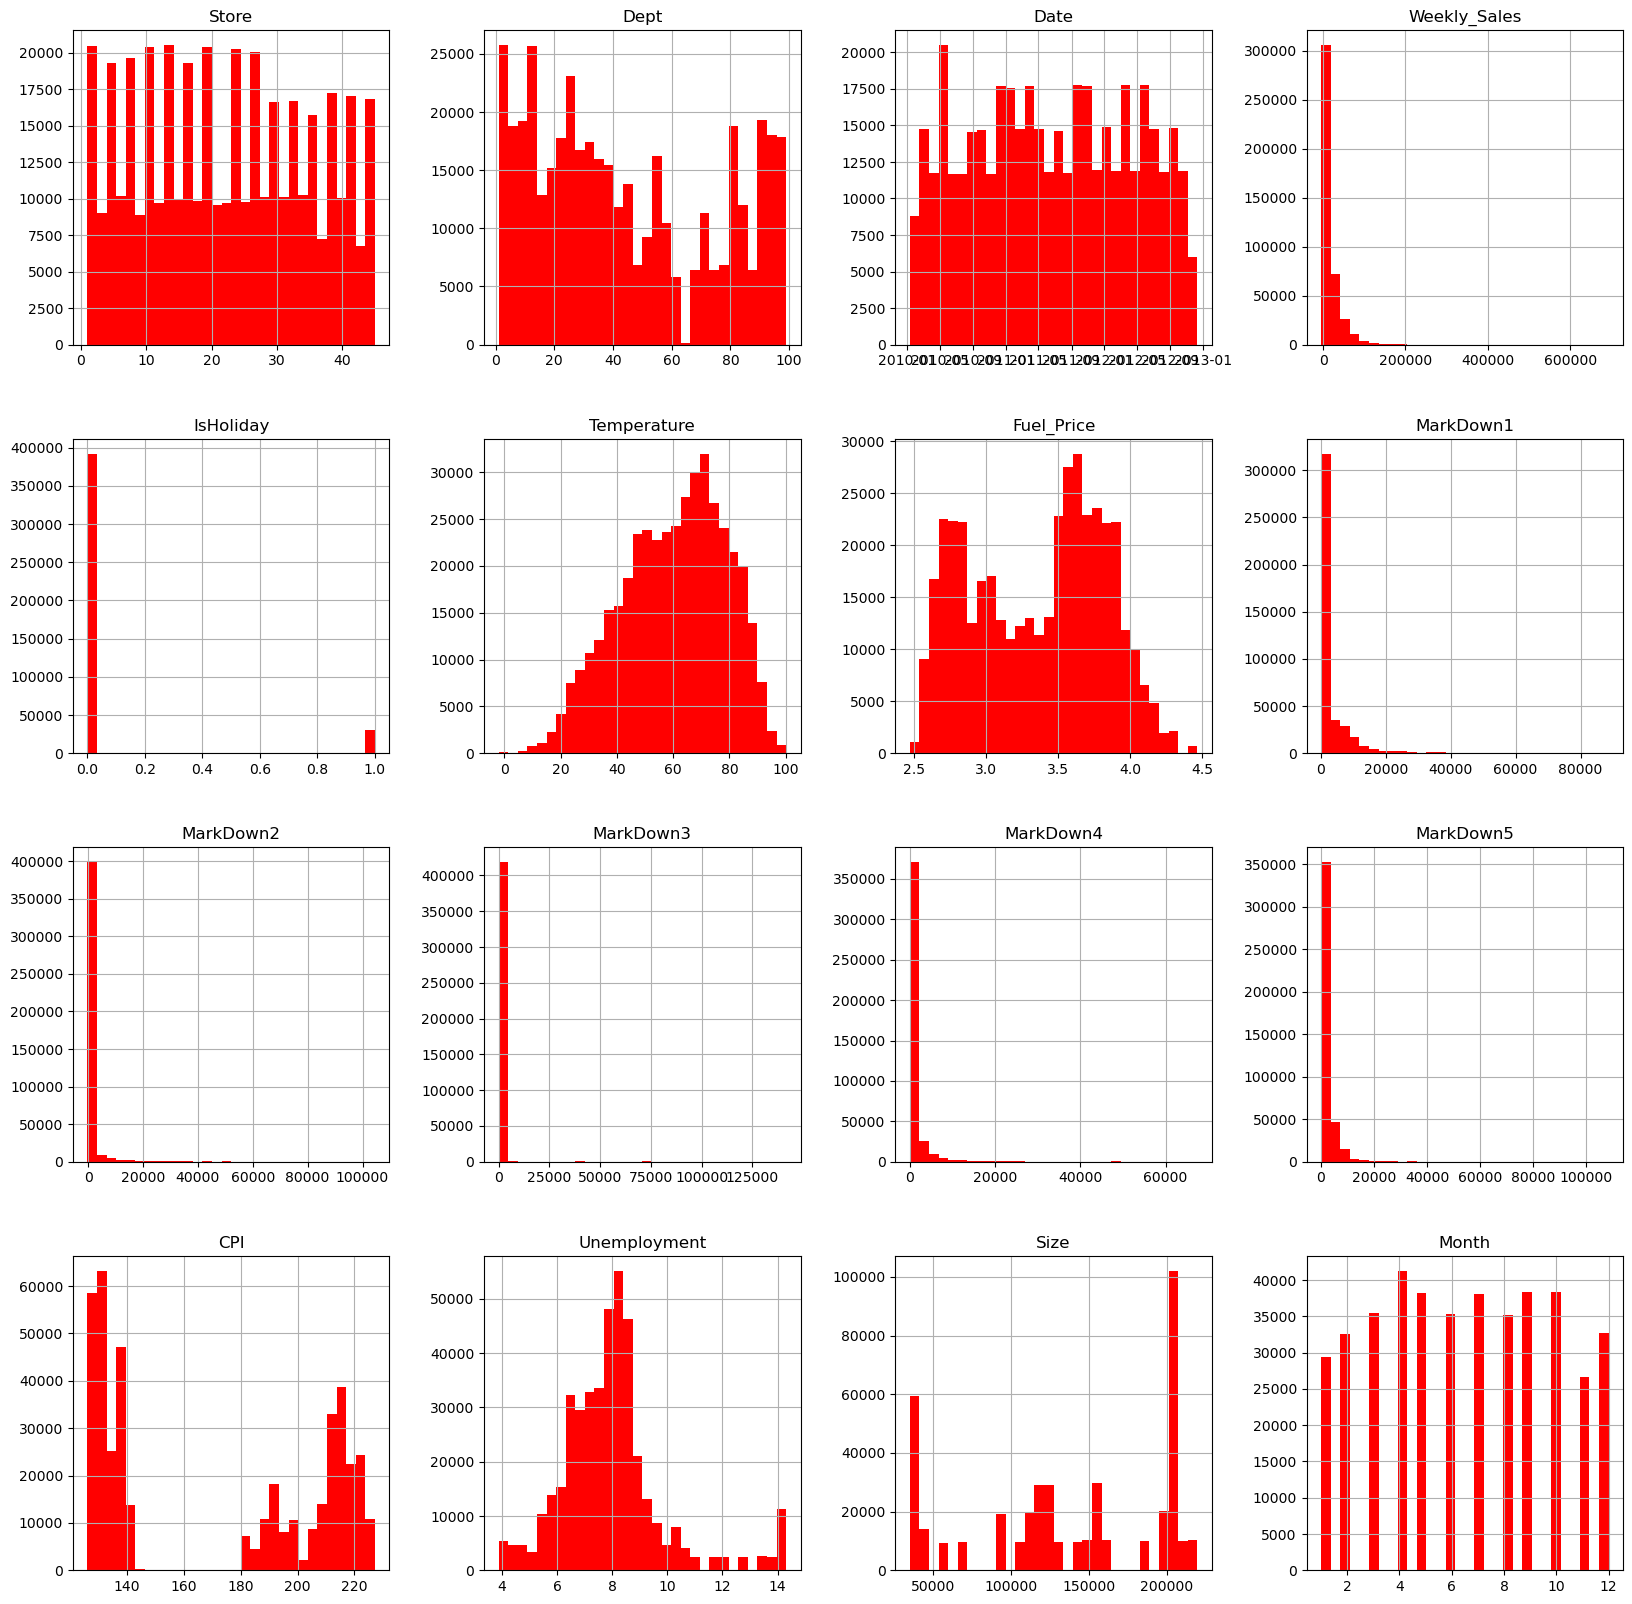

In [40]:
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

In [41]:
# visualizing the relationship using pairplots
# there is a relationship between markdown #1 and Markdown #4
# holiday and sales 
# Weekly sales and markdown #3
# sns.pairplot(df[["Weekly_Sales","IsHoliday","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Type","Month"]], diag_kind = "kde")

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

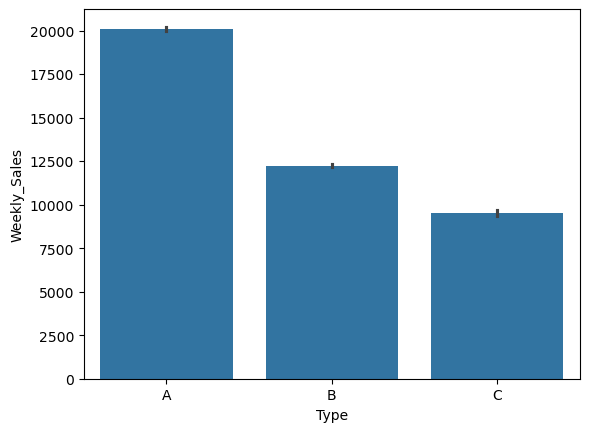

In [42]:
sns.barplot(x = df['Type'], y = df['Weekly_Sales'], data = df)

In [43]:
# df_dept = df.drop(columns = ['Store','Type','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Size','month'])
df_dept = df.groupby('Dept').mean()
df_dept

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month
Dept,,,,,,,,,,,,,,
1,23.000000,19213.485088,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
2,23.000000,43607.020113,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
3,23.000000,11793.698516,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
4,23.000000,25974.630238,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
5,22.757366,21365.583515,0.069797,60.559367,3.365397,2462.697233,830.226332,435.134596,1022.858240,1603.738276,171.109374,7.978057,131530.357964,6.479439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.000000,69824.423080,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.475524
96,23.258138,15210.942761,0.069839,61.539285,3.359920,2362.845647,820.762363,397.214137,999.452087,1660.599345,171.562686,7.849295,129282.010507,6.482489
97,23.357439,14255.576919,0.069767,60.490781,3.362418,2463.638764,833.096524,432.439341,1025.957821,1591.276367,170.445933,8.043564,130676.377190,6.477700


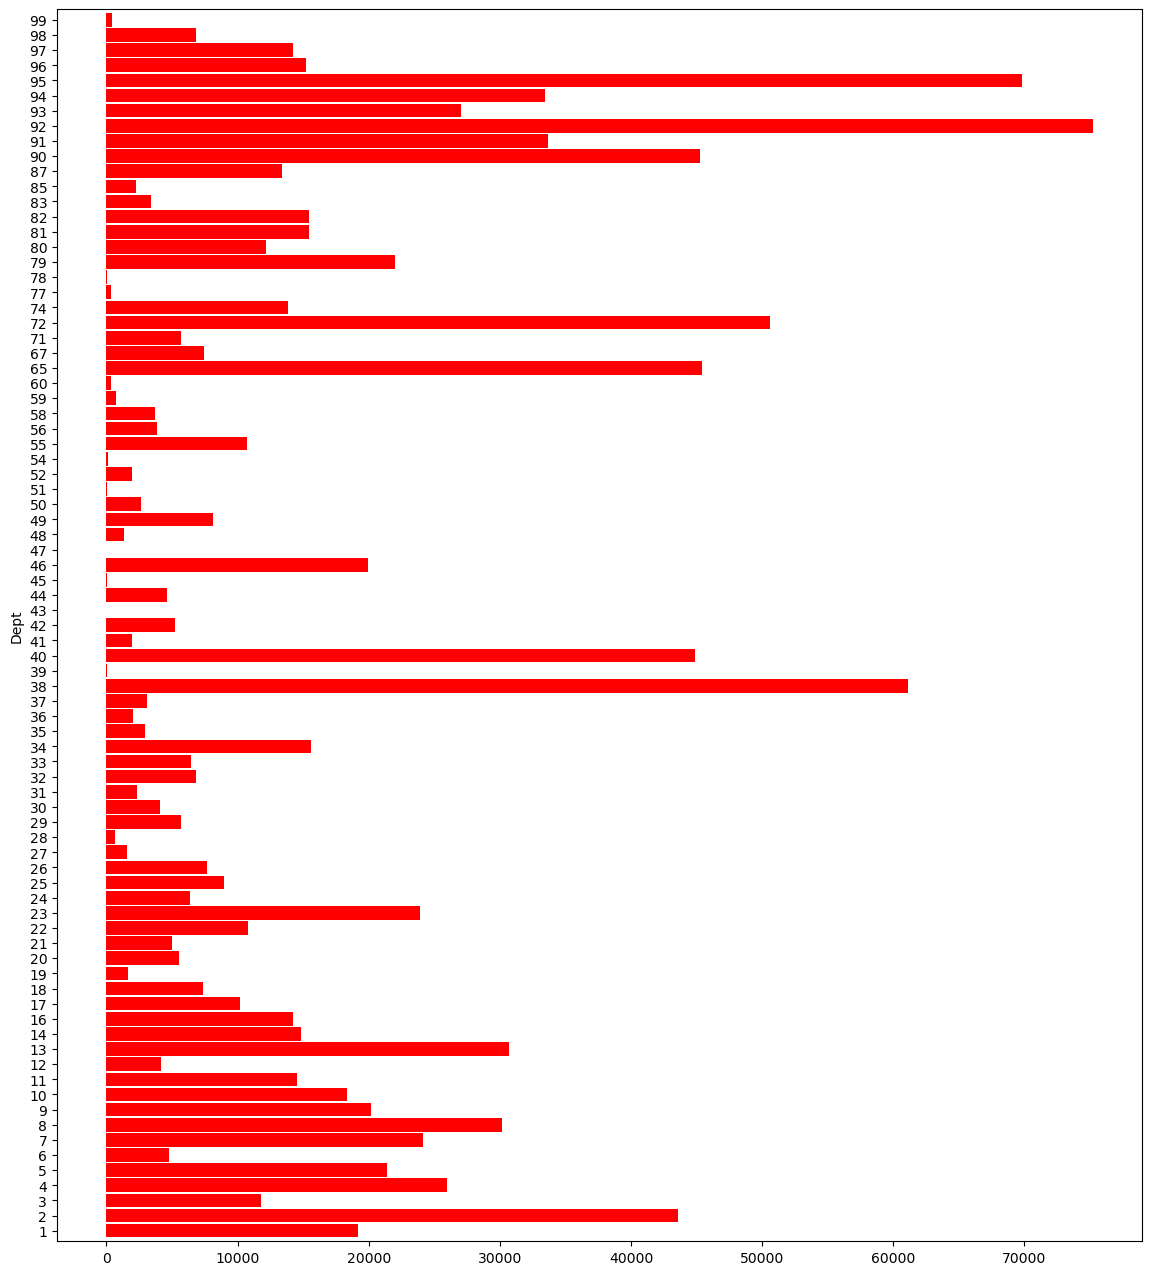

In [44]:
fig = plt.figure(figsize = (14,16))
df_dept['Weekly_Sales'].plot(kind = 'barh', color = 'r', width = 0.9)
plt.show()

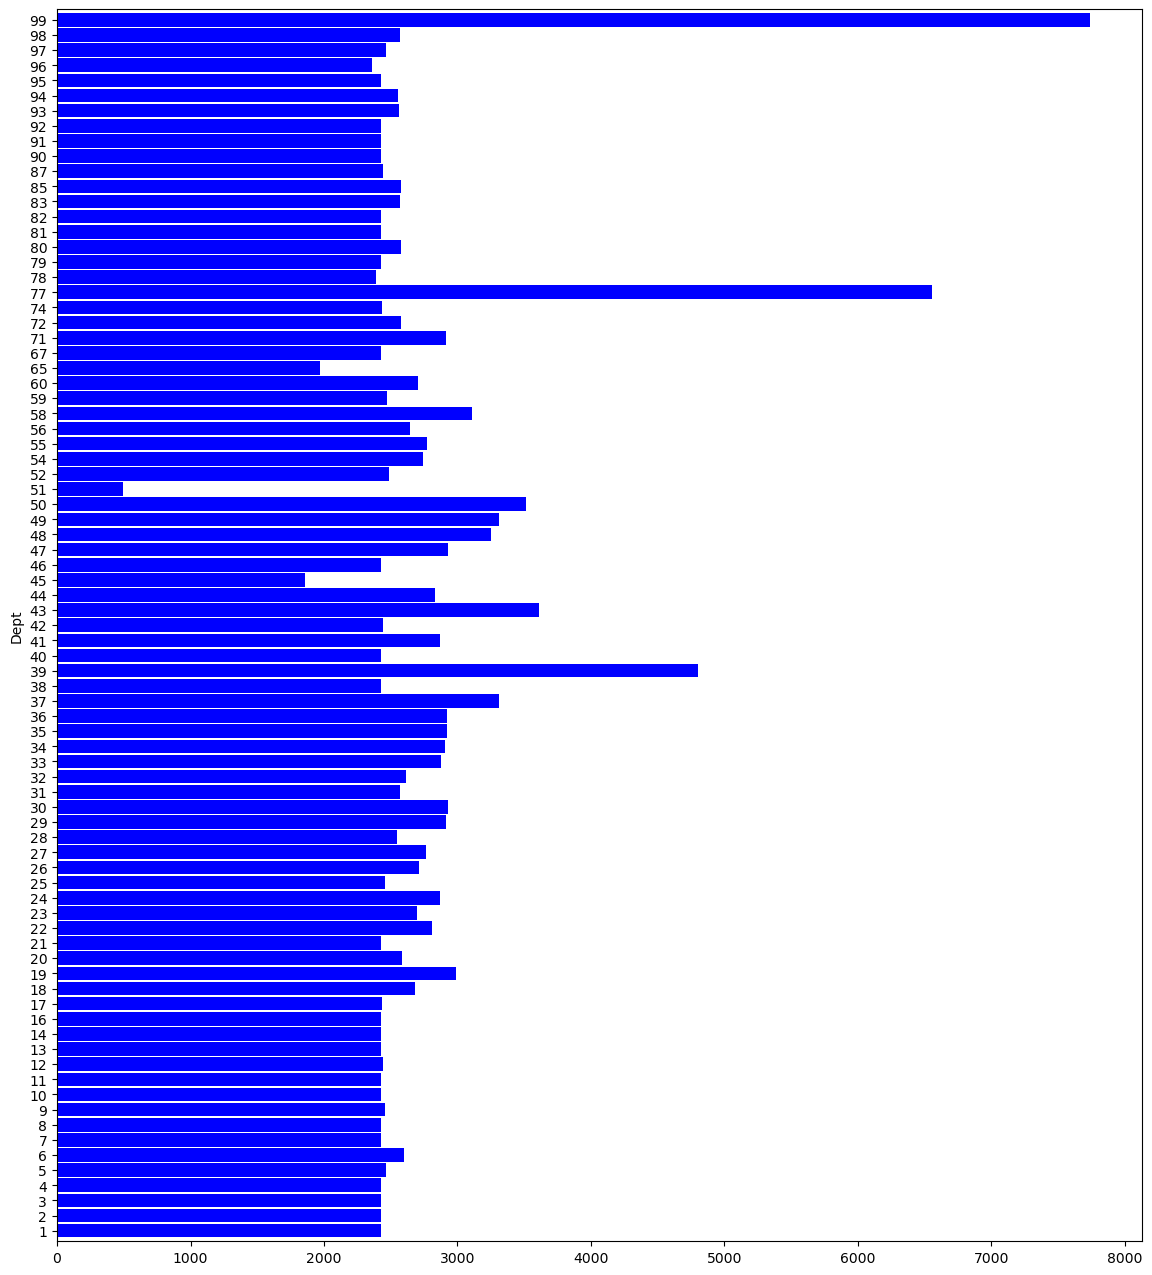

In [45]:
fig = plt.figure(figsize = (14,16))
df_dept['MarkDown1'].plot(kind = 'barh', color = 'blue', width = 0.9)
plt.show()

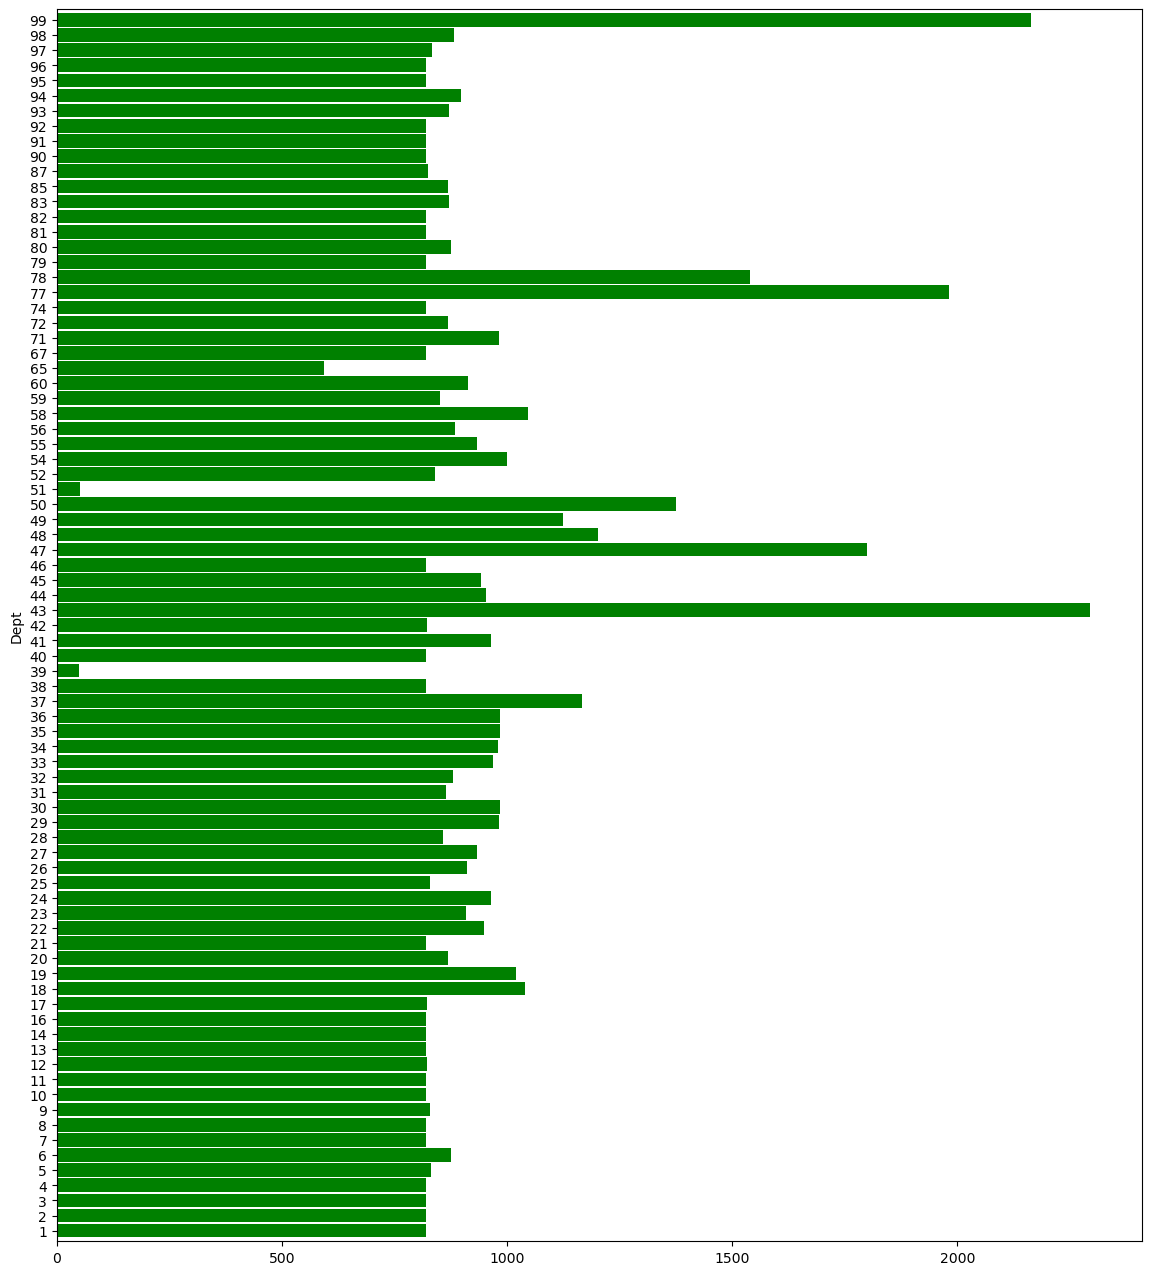

In [46]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown2'].plot(kind = 'barh', color = 'green', width = 0.9)
plt.show()

<Axes: ylabel='Dept'>

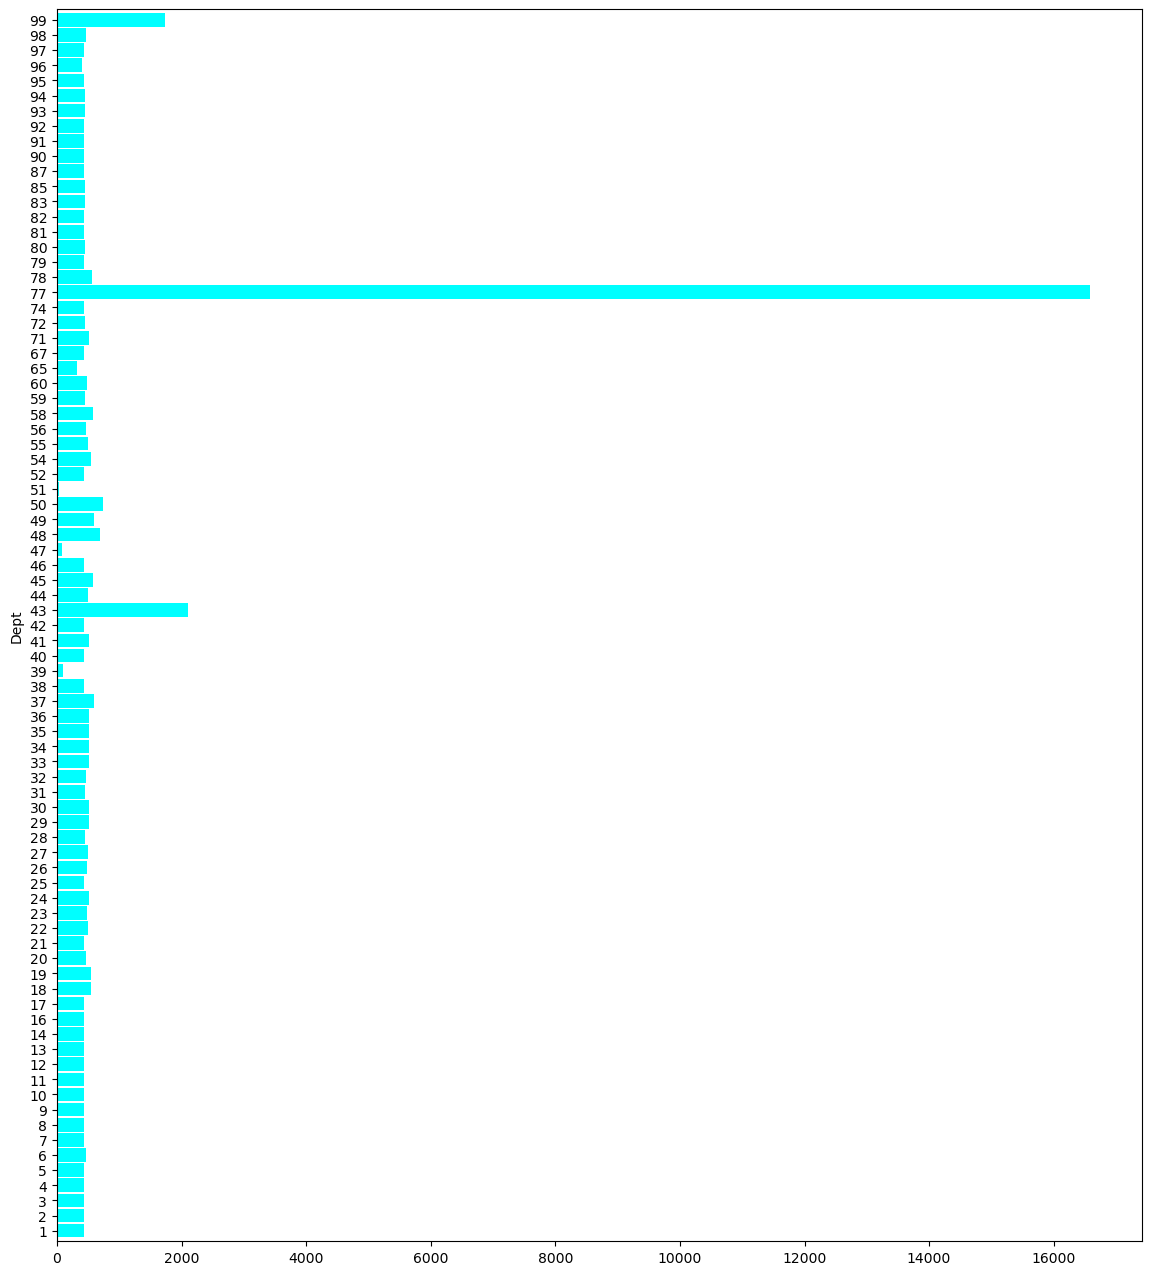

In [47]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown3'].plot(kind = 'barh', color = 'aqua', width = 0.9)

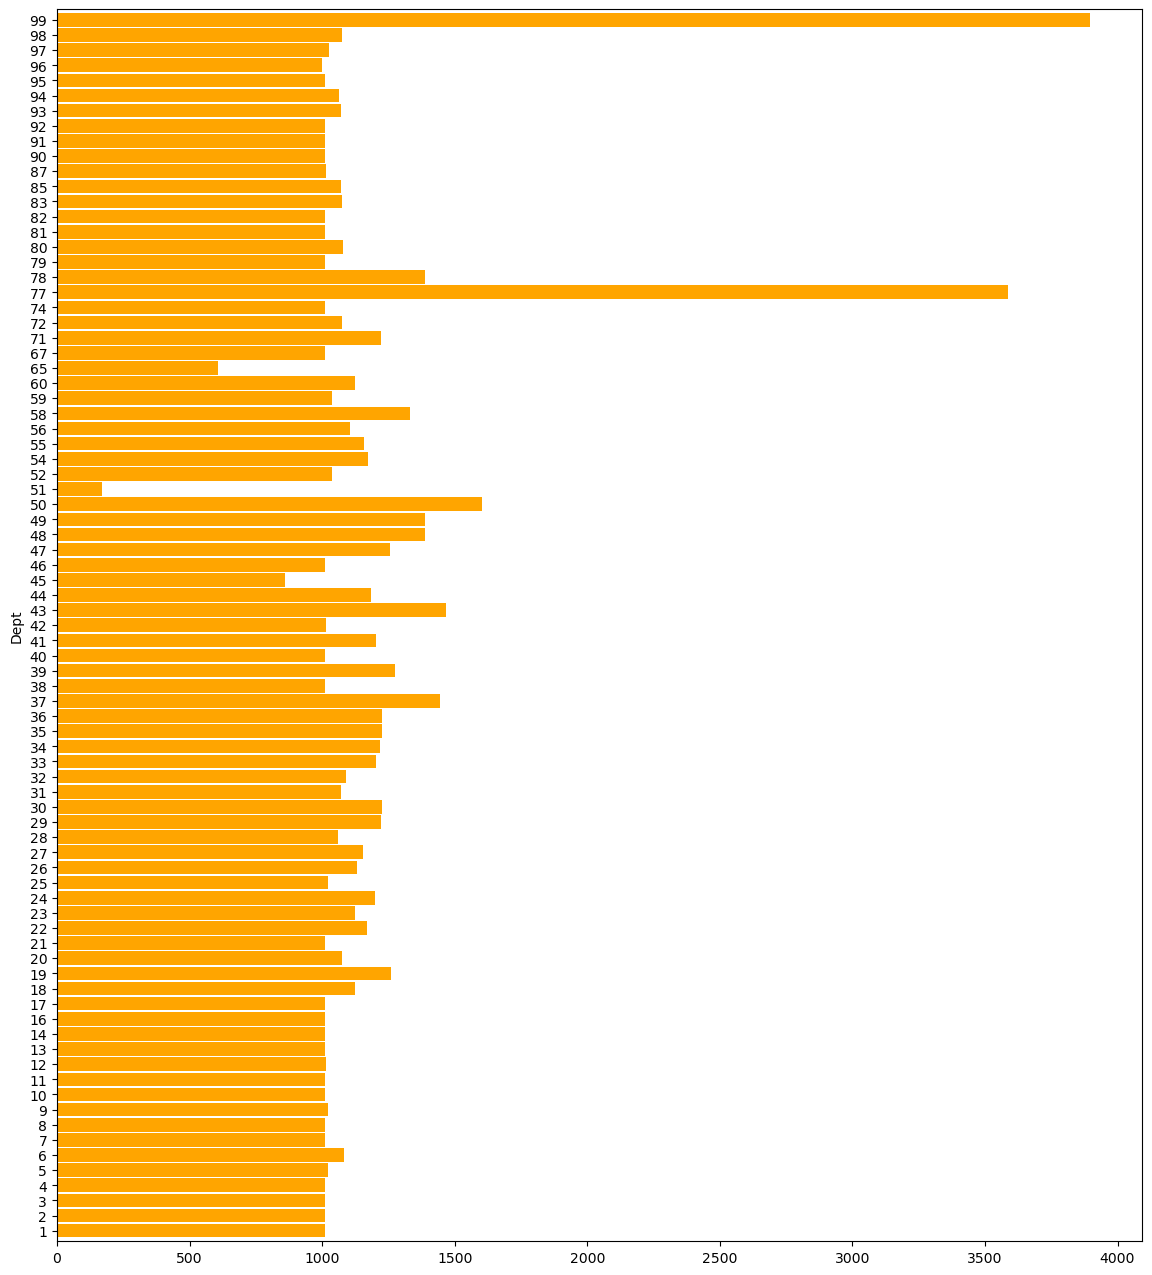

In [48]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown4'].plot(kind = 'barh', color = 'orange', width = 0.9)
plt.show()

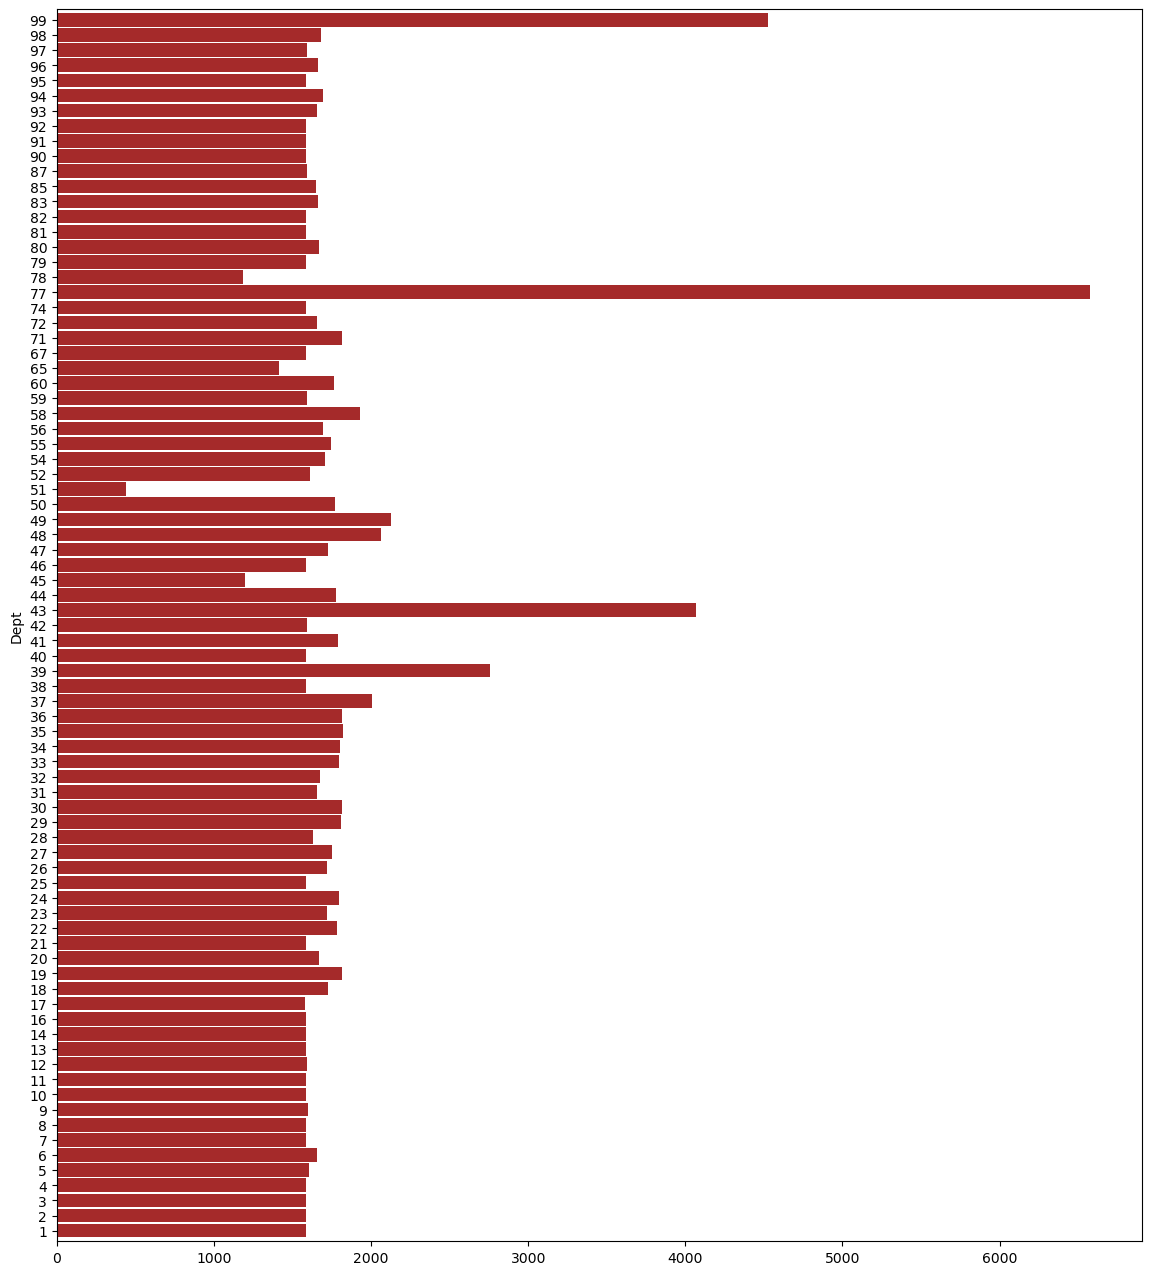

In [49]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown5'].plot(kind = 'barh', color = 'brown', width = 0.9)
plt.show()

- We can conclude that departments that have poor weekly sales have been assigned high number of markdowns. Let's explore this in more details
- Example: check out store 77 and 99 

In [50]:
# Sort by weekly sales
df_dept_sale = df_dept.sort_values(by = ['Weekly_Sales'], ascending = True)
df_dept_sale['Weekly_Sales'][:30]

Dept
47      -7.682554
43       1.193333
78       7.296638
39      11.123750
51      21.931729
45      23.211586
54     108.305985
77     328.961800
60     347.370229
99     415.487065
28     618.085116
59     694.463564
48    1344.893576
27    1583.437727
19    1654.815030
52    1928.356252
41    1965.559998
36    2022.571061
85    2264.359407
31    2339.440287
50    2658.897010
35    2921.044946
37    3111.076193
83    3383.349838
58    3702.907419
56    3833.706211
30    4118.197208
12    4175.397021
44    4651.729658
6     4747.856188
Name: Weekly_Sales, dtype: float64

#### PREPARE TRAINING, TEST AND VALIDATION DATA

In [51]:
# Drop the date
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])  # we remove the date because this analysis is a regression, not time-series

In [52]:
df_final = pd.get_dummies(df_final, columns = ['Type', 'Store', 'Dept'], drop_first = True)

In [53]:
df_final.shape

(421570, 138)

In [54]:
df_target.shape

(421570,)

In [55]:
df_final

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
1,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
3,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
4,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,...,0,0,0,1,0,0,0,0,0,0
421566,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,...,0,0,0,0,1,0,0,0,0,0
421567,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,...,0,0,0,0,0,1,0,0,0,0
421568,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,...,0,0,0,0,0,0,0,1,0,0


In [56]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [57]:
# We can comment out the standard scaling since it doesn't really impact the XGBoost performance.

# scaling the data before feeding the model
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler_x = StandardScaler()
# X = scaler_x.fit_transform(X)

# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)

In [58]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [59]:
X_train

array([[ 0.   , 47.92 ,  3.953, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 34.43 ,  2.58 , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 59.18 ,  2.81 , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 31.6  ,  2.992, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 69.94 ,  3.906, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 74.69 ,  3.711, ...,  0.   ,  0.   ,  0.   ]],
      dtype=float32)

#### TRAIN XGBOOST REGRESSOR IN LOCAL MODE

In [ ]:
 !pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.2 MB/s eta 0:00:00


In [ ]:
# Train an XGBoost regressor model 

import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 7, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# predict the score of the trained model using the testing dataset

result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.8671369552612305


In [ ]:
# make predictions on the test data

y_predict = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 8151.252 
MSE = 66442916.0 
MAE = 5214.6934 
R2 = 0.8671369552612305 
Adjusted R2 = 0.8665545002857246


MINI CHALLENGE
- Retrain the model with less 'max_depth'
- Comment on the results

In [ ]:
# Create empty list for scores
scores = []

for max_depth in range(1,11):
    model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = max_depth, n_estimators = 100)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)

    scores.append({'max_depth': max_depth, 'accuracy': train_score})
df_scores = pd.DataFrame(scores)
df_scores

,max_depth,accuracy
0,1,0.432124
1,2,0.631070
2,3,0.719209
3,4,0.772792
4,5,0.812257
5,6,0.847354
6,7,0.872550
7,8,0.890394
8,9,0.907750
9,10,0.918560


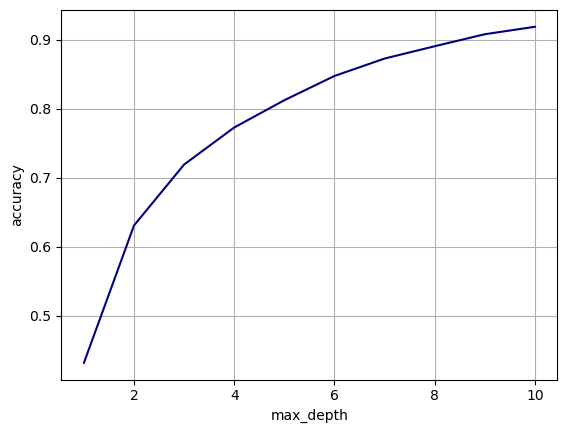

In [ ]:
sns.lineplot(data = df_scores, x = 'max_depth', y = 'accuracy', c='navy');
plt.grid(True)
plt.show()

#### TRAIN XGBOOST USING SAGEMAKER

In [67]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

# train_data = pd.DataFrame(y_train,columns=['target'])
train_data = pd.DataFrame({'Target':y_train[:,]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]


In [68]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,11726.299805,0.0,47.919998,3.953,10660.099609,225.110001,1.500000,2560.040039,4748.100098,214.164703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,63647.468750,0.0,34.430000,2.580,0.000000,0.000000,0.000000,0.000000,0.000000,189.381699,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2570.629883,0.0,59.180000,2.810,0.000000,0.000000,0.000000,0.000000,0.000000,126.562103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,264.000000,0.0,46.570000,3.415,6176.689941,2.870000,379.570007,1593.439941,10170.500000,188.654465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2809.010010,1.0,16.809999,3.037,0.000000,0.000000,0.000000,0.000000,0.000000,191.857285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
val_data = pd.DataFrame({'Target':y_val[:,]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [70]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,13582.769531,0.0,84.059998,3.594,0.000000,0.000000,0.00,0.000000,0.000000,213.840271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1876.300049,0.0,33.180000,3.917,6881.029785,5859.120117,1.00,3607.570068,4147.129883,137.341110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,82.000000,0.0,71.930000,3.620,10737.660156,423.399994,5.06,1904.520020,3823.070068,191.029968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1665.219971,0.0,21.820000,3.263,0.000000,0.000000,0.00,0.000000,0.000000,133.370148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45615.210938,0.0,53.200001,3.734,10556.610352,43.540001,15.84,1116.829956,8179.029785,130.967102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
val_data.shape

(31618, 139)

In [72]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [76]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

# Define some s3 storage paths
bucket = 'woodzee-data-science-projects' 
prefix = 'XGBoost-Regressor'
key =  'XGBoost-Regressor'

#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

[02/04/25 16:38:24] INFO     Found credentials from IAM Role:                                   ]8;id=591795;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=766441;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=252000;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=92239;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [74]:
print(role)

arn:aws:iam::970547371282:role/service-role/AmazonSageMaker-ExecutionRole-20250202T133633


In [77]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

[02/04/25 16:38:29] INFO     Found credentials from IAM Role:                                   ]8;id=581499;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=849200;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

uploaded training data location: s3://woodzee-data-science-projects/XGBoost-Regressor/train/XGBoost-Regressor


In [78]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

[02/04/25 16:38:37] INFO     Found credentials from IAM Role:                                   ]8;id=412954;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=789879;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

uploaded validation data location: s3://woodzee-data-science-projects/XGBoost-Regressor/validation/XGBoost-Regressor


In [79]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://woodzee-data-science-projects/XGBoost-Regressor/output


In [80]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

[02/04/25 16:39:06] WARNING  The method get_image_uri has been renamed in sagemaker>=2.          ]8;id=739406;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=154640;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    INFO     Defaulting to only available Python version: py3                     ]8;id=865220;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=270313;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#608\608]8;;\

                    INFO     Defaulting to only supported image scope: cpu.                       ]8;id=727552;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=875196;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#532\532]8;;\

In [81]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )



[02/04/25 17:29:28] WARNING  train_instance_count has been renamed in sagemaker>=2.              ]8;id=427843;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=342277;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    WARNING  train_instance_type has been renamed in sagemaker>=2.               ]8;id=618897;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=144993;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    INFO     Found credentials from IAM Role:                                   ]8;id=179539;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=454845;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [82]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

[02/04/25 17:36:31] WARNING  The class sagemaker.session.s3_input has been renamed in            ]8;id=800736;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=312290;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             sagemaker>=2.                                                                         
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

[02/04/25 17:36:32] WARNING  The class sagemaker.session.s3_input has been renamed in            ]8;id=582607;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=375247;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             sagemaker>=2.                                                                         
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=726927;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=157430;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Creating training-job with name:                                       ]8;id=318427;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=72491;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\
                             sagemaker-xgboost-2025-02-04-17-36-32-011                                             

2025-02-04 17:36:33 Starting - Starting the training job...
..25-02-04 17:36:48 Starting - Preparing the instances for training.
..25-02-04 17:37:35 Downloading - Downloading the training image.
..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[17:38:18] 358334x138 matrix with 49450092 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO:root:Determined delimiter of CSV input is ','
[17:38:18] 31618x138 matrix with 4363284 entries loaded from /opt/ml/input/data/validation?format=csv&label_colu

#### DEPLOY THE MODEL TO ENDPOINT TO MAKE PREDICTIONS

In [84]:
# Deploy the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, 
                                              instance_type = 'ml.m5.2xlarge', 
                                              endpoint_name='xgboost-predictions')

[02/04/25 17:40:02] INFO     Creating model with name: sagemaker-xgboost-2025-02-04-17-40-02-402    ]8;id=415734;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=716403;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[02/04/25 17:40:03] INFO     Creating endpoint-config with name xgboost-predictions                 ]8;id=338749;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=545534;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

                    INFO     Creating endpoint with name xgboost-predictions                        ]8;id=255168;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=242290;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----!

In [95]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''

from sagemaker.serializers import CSVSerializer, JSONSerializer
from sagemaker.deserializers import JSONDeserializer
from sagemaker.predictor import Predictor

Xgboost_regressor.serializer = CSVSerializer(content_type='text/csv')


In [96]:
X_test.shape

(31618, 138)

In [97]:
# making prediction

predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [98]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])

In [99]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])

In [100]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])

In [101]:
predictions4

b'17170.69140625,17444.859375,8567.86328125,10408.8466796875,18485.126953125,16631.421875,-1719.1180419921875,12241.3984375,247.7288818359375,10163.44921875,-1849.161376953125,14111.9228515625,16550.462890625,37560.359375,10393.0185546875,4126.3203125,15447.7744140625,66881.4609375,40823.6171875,263.8804626464844,930.6925048828125,22843.458984375,6026.8544921875,4190.63427734375,15873.9189453125,1890.5467529296875,3432.7998046875,17677.3515625,2689.18701171875,6458.45458984375,13110.5498046875,3430.31982421875,6365.810546875,20055.23828125,61570.4375,12474.451171875,17447.97265625,7316.173828125,9312.796875,93144.0390625,5179.74951171875,24398.18359375,16335.2294921875,8254.0888671875,936.1004638671875,9442.759765625,4567.20166015625,24241.556640625,5959.03564453125,31494.005859375,3398.75244140625,4600.9775390625,20432.103515625,4808.5498046875,6267.43896484375,15731.9462890625,46304.65234375,6149.2353515625,16780.740234375,7213.32666015625,5633.5146484375,7869.7177734375,3849.6865234

In [102]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [103]:
predicted_values_1 = bytes_2_array(predictions1)

In [104]:
predicted_values_1.shape

(10000, 1)

In [105]:
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [106]:
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [107]:
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [108]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [109]:
predicted_values.shape

(31618, 1)

In [110]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 7156.922 
MSE = 51221530.0 
MAE = 4313.185 
R2 = 0.8975745439529419 
Adjusted R2 = 0.897125523560474


In [111]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

[02/04/25 18:13:06] INFO     Deleting endpoint configuration with name: xgboost-predictions         ]8;id=765331;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=653776;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4865\4865]8;;\

[02/04/25 18:13:07] INFO     Deleting endpoint with name: xgboost-predictions                       ]8;id=811964;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=130245;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4855\4855]8;;\

#### TRAIN THE MODEL WITH BEST PARAMETERS  (RETRIEVE BEST PARAMETERS FROM AWS SAGEMAKER CONSOLE - 'BEST MODEL')

In [112]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# We can tune the hyper-parameters to improve the performance of the model
Xgboost_regressor.set_hyperparameters(max_depth=25,
                           objective='reg:linear',
                           colsample_bytree = 0.3913546819101119,
                           alpha = 1.0994354985124635,
                           eta = 0.23848185159806115,
                           num_round = 237
                           )


[02/04/25 18:13:37] WARNING  train_instance_count has been renamed in sagemaker>=2.              ]8;id=935901;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=127807;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    WARNING  train_instance_type has been renamed in sagemaker>=2.               ]8;id=87853;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=747620;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

In [ ]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')
data_channels = {'train': train_input,'validation': valid_input}
Xgboost_regressor.fit(data_channels)

[02/04/25 18:13:45] WARNING  The class sagemaker.session.s3_input has been renamed in            ]8;id=15272;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=28231;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             sagemaker>=2.                                                                         
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    WARNING  The class sagemaker.session.s3_input has been renamed in            ]8;id=607213;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=689702;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             sagemaker>=2.                                                                         
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=330388;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=367412;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Creating training-job with name:                                       ]8;id=144254;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=454196;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\
                             sagemaker-xgboost-2025-02-04-18-13-45-794                                             

2025-02-04 18:13:46 Starting - Starting the training job...
..25-02-04 18:14:17 Starting - Preparing the instances for training.
..25-02-04 18:14:41 Downloading - Downloading input data.
.....02-04 18:15:16 Downloading - Downloading the training image.
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[18:16:12] 358334x138 matrix with 49450092 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO:root:Determined delimiter of CSV input is ','
[18:16:12] 31618x138 matrix with 4363284 entries loaded 

In [114]:
# Deploying the model to perform inference

Xgboost_regressor = Xgboost_regressor.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge',
                                          endpoint_name='xgboost-predictions')

[02/04/25 18:27:57] INFO     Creating model with name: sagemaker-xgboost-2025-02-04-18-27-56-850    ]8;id=347107;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=740200;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

                    INFO     Creating endpoint-config with name xgboost-predictions                 ]8;id=698160;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=995174;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

                    INFO     Creating endpoint with name xgboost-predictions                        ]8;id=494186;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=353971;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

------!

In [115]:
Xgboost_regressor.serializer = CSVSerializer(content_type='text/csv')

In [118]:
# Try to make inference with the entire testing dataset (Crashes!, so we need to feed the test dataset in batches)
predictions = Xgboost_regressor.predict(X_test)
predicted_values = bytes_2_array(predictions)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 # Try to make inference with the entire testing dataset (Crashes!)                           │
│ ❱ 2 predictions = Xgboost_regressor.predict(X_test)                                              │
│   3 predicted_values = bytes_2_array(predictions)                                                │
│   4                                                                                              │
│                                                                                                  │
│ /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/base_predictor.py:2 │
│ 12 in predict                                                                                    │
│                                                                                                  │
│   209 │   │   if inference_component_name:                                                       │
│   210 │   │   │   request_args["InferenceComponentName"] = inference_component_name              │
│   211 │   │                                                                                      │
│ ❱ 212 │   │   response = self.sagemaker_session.sagemaker_runtime_client.invoke_endpoint(**req   │
│   213 │   │   return self._handle_response(response)                                             │
│   214 │                                                                                          │
│   215 │   def _handle_response(self, response):                                                  │
│                                                                                                  │
│ /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/client.py:569 in     │
│ _api_call                                                                                        │
│                                                                                                  │
│    566 │   │   │   │   │   f"{py_operation_name}() only accepts keyword arguments."              │
│    567 │   │   │   │   )                                                                         │
│    568 │   │   │   # The "self" in this scope is referring to the BaseClient.                    │
│ ❱  569 │   │   │   return self._make_api_call(operation_name, kwargs)                            │
│    570 │   │                                                                                     │
│    571 │   │   _api_call.__name__ = str(py_operation_name)                                       │
│    572                                                                                           │
│                                                                                                  │
│ /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/client.py:1023 in    │
│ _make_api_call                                                                                   │
│                                                                                                  │
│   1020 │   │   │   │   "Code"                                                                    │
│   1021 │   │   │   )                                                                             │
│   1022 │   │   │   error_class = self.exceptions.from_code(error_code)                           │
│ ❱ 1023 │   │   │   raise error_class(parsed_response, operation_name)                            │
│   1024 │   │   else:                                                                             │
│   1025 │   │   │   return parsed_response                                                        │
│   1026                                                     

In [119]:
predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [120]:
predicted_values_1 = bytes_2_array(predictions1)
predicted_values_1.shape

(10000, 1)

In [121]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [122]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [123]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [124]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [125]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4192.405 
MSE = 17576264.0 
MAE = 1835.5442 
R2 = 0.9648535251617432 
Adjusted R2 = 0.9646994474106176


In [126]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

[02/04/25 18:41:37] INFO     Deleting endpoint configuration with name: xgboost-predictions         ]8;id=530521;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=82079;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4865\4865]8;;\

                    INFO     Deleting endpoint with name: xgboost-predictions                       ]8;id=246745;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=589578;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4855\4855]8;;\